<a href="https://colab.research.google.com/github/jagadeesh01032005/Generative-AI/blob/main/gen_final_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Obesity prediction.csv")
print(df)


      Gender        Age    Height      Weight family_history FAVC  FCVC  NCP  \
0     Female  21.000000  1.620000   64.000000            yes   no   2.0  3.0   
1     Female  21.000000  1.520000   56.000000            yes   no   3.0  3.0   
2       Male  23.000000  1.800000   77.000000            yes   no   2.0  3.0   
3       Male  27.000000  1.800000   87.000000             no   no   3.0  3.0   
4       Male  22.000000  1.780000   89.800000             no   no   2.0  1.0   
...      ...        ...       ...         ...            ...  ...   ...  ...   
2106  Female  20.976842  1.710730  131.408528            yes  yes   3.0  3.0   
2107  Female  21.982942  1.748584  133.742943            yes  yes   3.0  3.0   
2108  Female  22.524036  1.752206  133.689352            yes  yes   3.0  3.0   
2109  Female  24.361936  1.739450  133.346641            yes  yes   3.0  3.0   
2110  Female  23.664709  1.738836  133.472641            yes  yes   3.0  3.0   

           CAEC SMOKE      CH2O  SCC   

CONVERTING TEXT INTO NUMERICAL

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity"]

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())


   Gender   Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0    1.62    64.0               1     0   2.0  3.0     2      0   
1       0  21.0    1.52    56.0               1     0   3.0  3.0     2      1   
2       1  23.0    1.80    77.0               1     0   2.0  3.0     2      0   
3       1  27.0    1.80    87.0               0     0   3.0  3.0     2      0   
4       1  22.0    1.78    89.8               0     0   2.0  1.0     2      0   

   CH2O  SCC  FAF  TUE  CALC  MTRANS  Obesity  
0   2.0    0  0.0  1.0     3       3        1  
1   3.0    1  3.0  0.0     2       3        1  
2   2.0    0  2.0  1.0     1       3        1  
3   2.0    0  2.0  0.0     1       4        5  
4   2.0    0  0.0  0.0     2       3        6  


y value

In [ ]:
y = df['Obesity']
print(y)

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: Obesity, Length: 2111, dtype: int64


x value

In [ ]:
x = df.drop('Obesity', axis=1)
print(x)

      Gender        Age    Height      Weight  family_history  FAVC  FCVC  \
0          0  21.000000  1.620000   64.000000               1     0   2.0   
1          0  21.000000  1.520000   56.000000               1     0   3.0   
2          1  23.000000  1.800000   77.000000               1     0   2.0   
3          1  27.000000  1.800000   87.000000               0     0   3.0   
4          1  22.000000  1.780000   89.800000               0     0   2.0   
...      ...        ...       ...         ...             ...   ...   ...   
2106       0  20.976842  1.710730  131.408528               1     1   3.0   
2107       0  21.982942  1.748584  133.742943               1     1   3.0   
2108       0  22.524036  1.752206  133.689352               1     1   3.0   
2109       0  24.361936  1.739450  133.346641               1     1   3.0   
2110       0  23.664709  1.738836  133.472641               1     1   3.0   

      NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  MTRANS  
0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

Accuracy: 0.87
Precision: 0.88
Recall: 0.87
F1-score: 0.87


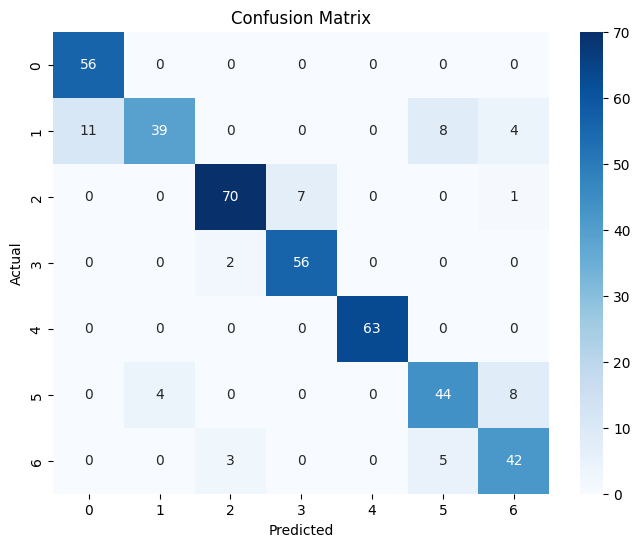

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer

X = df.iloc[:, :-1]  # Features (all columns except the last)
y = df.iloc[:, -1]   # Target variable (last column)

if y.dtype == 'object':
    y = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**KNeighborsClassifier**

Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-score: 0.81


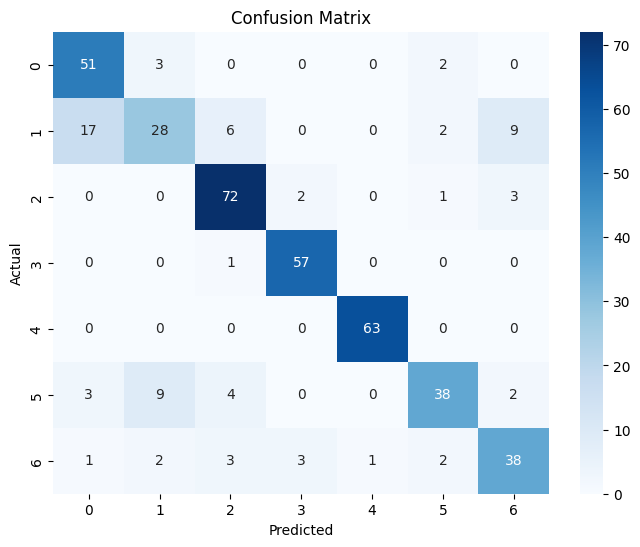

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer


X = df.iloc[:, :-1]  # Features (all columns except the last)
y = df.iloc[:, -1]   # Target variable (last column)

if y.dtype == 'object':
    y = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**SVM**

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-score: 0.89


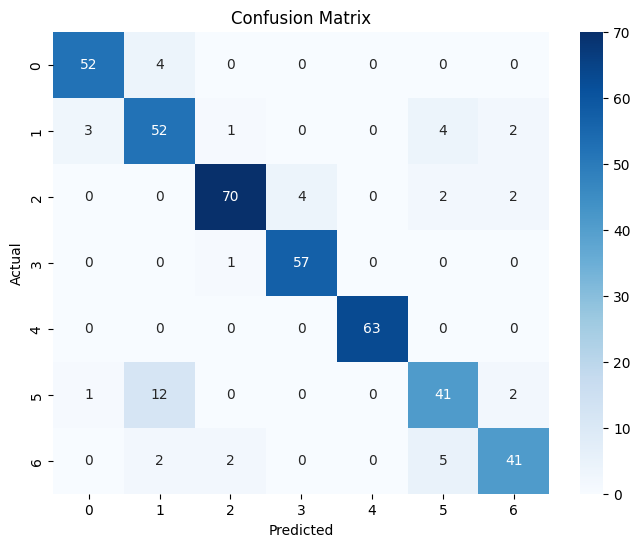

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer


X = df.iloc[:, :-1]  # Features (all columns except the last)
y = df.iloc[:, -1]   # Target variable (last column)

if y.dtype == 'object':
    y = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train SVM model (using RBF kernel, you can change to 'linear' or 'poly' if needed)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**XGBoost** **Classifier**

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-score: 0.95


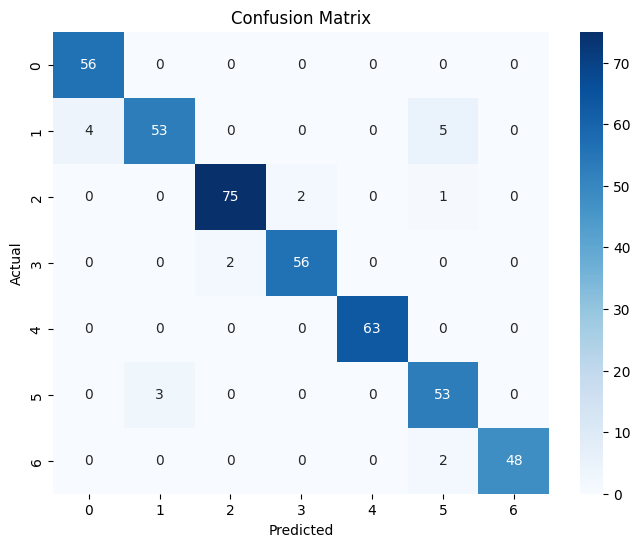

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer

X = df.iloc[:, :-1]  # Features (all columns except the last)
y = df.iloc[:, -1]   # Target variable (last column)

if y.dtype == 'object':
    y = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train XGBoost Classifier model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


CatBoost Classifier

In [ ]:
!pip install catboost -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


0:	learn: 1.8344600	total: 106ms	remaining: 1m 46s
100:	learn: 0.2519881	total: 8.74s	remaining: 1m 17s
200:	learn: 0.1176434	total: 19.8s	remaining: 1m 18s
300:	learn: 0.0693122	total: 29.2s	remaining: 1m 7s
400:	learn: 0.0494986	total: 39.5s	remaining: 59s
500:	learn: 0.0378369	total: 51.2s	remaining: 51s
600:	learn: 0.0301517	total: 1m 3s	remaining: 42.2s
700:	learn: 0.0252598	total: 1m 15s	remaining: 32.2s
800:	learn: 0.0215045	total: 1m 27s	remaining: 21.8s
900:	learn: 0.0185787	total: 1m 36s	remaining: 10.6s
999:	learn: 0.0162844	total: 1m 41s	remaining: 0us
Accuracy: 0.9598
Precision: 0.9609
Recall: 0.9598
F1-score: 0.9601

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.87      0.93      0.90        58
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5

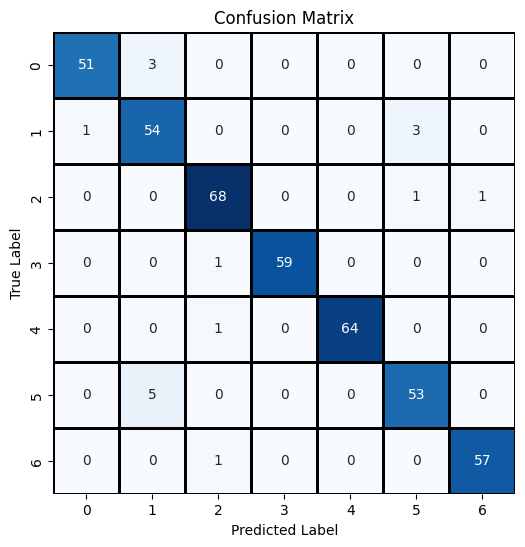

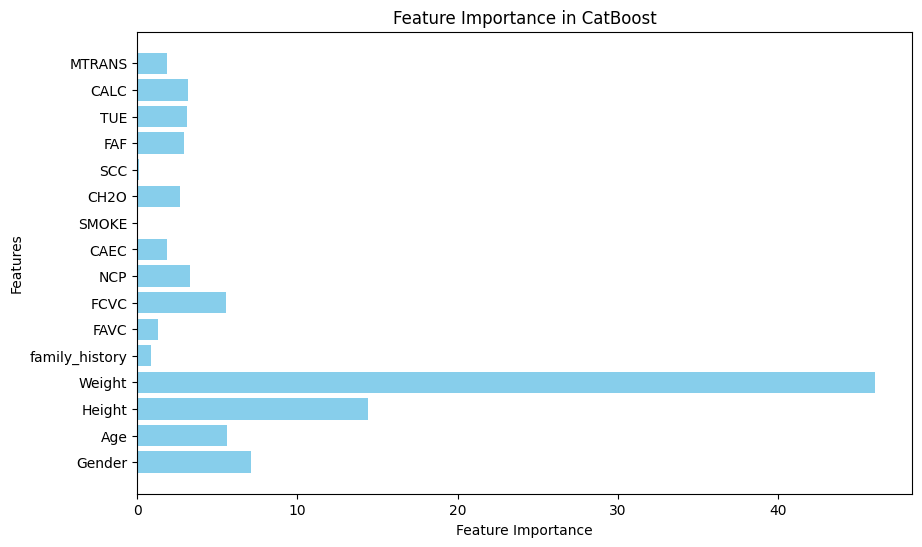

In [ ]:
import subprocess
import sys

def install_catboost():
    try:
        import catboost
    except ModuleNotFoundError:
        print("Installing CatBoost...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "catboost"])

install_catboost()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


categorical_cols = ["Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity"]

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=["Obesity"])
y = df["Obesity"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the CatBoost Classifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=8, loss_function='MultiClass', verbose=100)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}\n")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix inside a box
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='black', square=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance
feature_importance = model.get_feature_importance()
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in CatBoost')
plt.show()


 Adam (Adaptive Moment Estimation) with epoch value 30

Columns in dataset: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2224 - loss: 1.8983 - val_accuracy: 0.5768 - val_loss: 1.5106
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5810 - loss: 1.4059 - val_accuracy: 0.6407 - val_loss: 1.1120
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6515 - loss: 1.0418 - val_accuracy: 0.6927 - val_loss: 0.9061
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7357 - loss: 0.8380 - val_accuracy: 0.7423 - val_loss: 0.7890
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7809 - loss: 0.6989 - val_accuracy: 0.7636 - val_loss: 0.6880
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8096 - loss: 0.6135 - val_accuracy: 0.8109 - val_loss: 0.6187
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8284 - loss: 0.5467 - val_accuracy: 0.8132 - val_loss: 0.5575
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8519 - loss: 0.4557 - val_accuracy: 0.8251 - val_loss

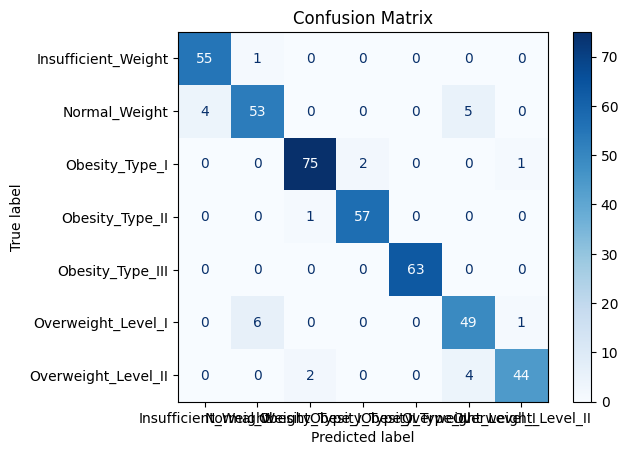

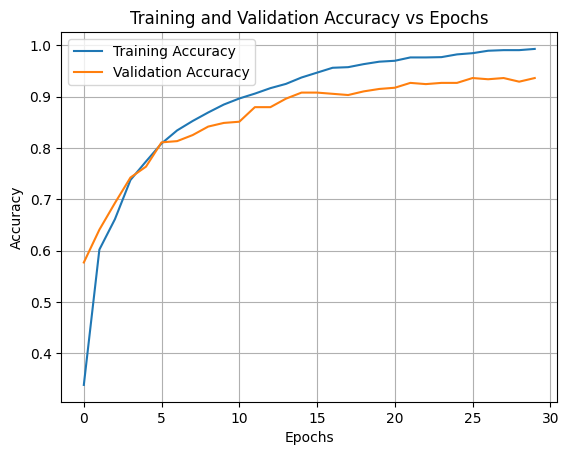

In [ ]:

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

file_path = "/content/Obesity prediction.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()
print("Columns in dataset:", df.columns)

target_column = "Obesity"
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset. Available columns: {df.columns}")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert target to categorical (if classification)
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with actual epochs
epochs = 30
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions and true labels to their original classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders[target_column].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

model.save("obesity_prediction_model.h5")


EPOCH VALUE 60

Columns in dataset: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')
Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2320 - loss: 1.8880 - val_accuracy: 0.4894 - val_loss: 1.5482
Epoch 2/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5384 - loss: 1.4231 - val_accuracy: 0.5863 - val_loss: 1.1669
Epoch 3/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5969 - loss: 1.0972 - val_accuracy: 0.6667 - val_loss: 0.9217
Epoch 4/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7104 - loss: 0.8605 - val_accuracy: 0.7258 - val_loss: 0.7733
Epoch 5/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7836 - loss: 0.7177 - val_accuracy: 0.7447 - val_loss: 0.6629
Epoch 6/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8053 - loss: 0.6095 - val_accuracy: 0.7825 - val_loss: 0.5879
Epoch 7/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8323 - loss: 0.5302 - val_accuracy: 0.8203 - val_loss: 0.5179
Epoch 8/60
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8686 - loss: 0.4385 - val_accuracy: 0.8440 - val_loss: 0.4651


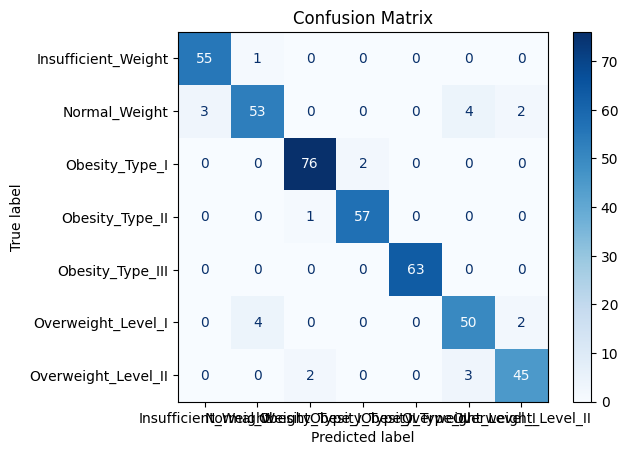

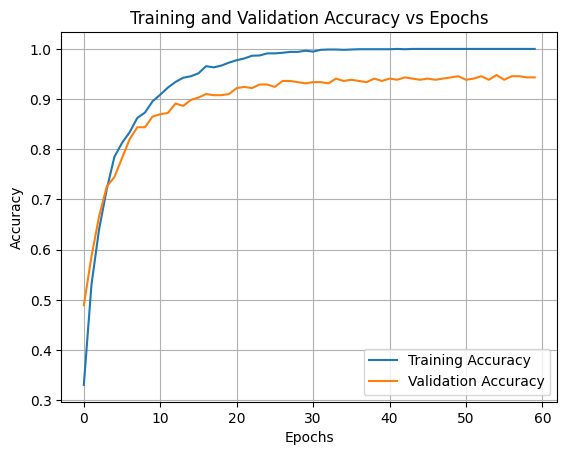

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

file_path = "/content/Obesity prediction.csv"
df = pd.read_csv(file_path)

# Check and clean column names
df.columns = df.columns.str.strip()
print("Columns in dataset:", df.columns)

# Ensure correct target column name
target_column = "Obesity"
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset. Available columns: {df.columns}")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert target to categorical (if classification)
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 60
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions and true labels to their original classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders[target_column].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot the graph for epochs vs accuracy
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Save the model (Optional)
model.save("obesity_prediction_model.h5")


EPOCH VALUE 90

Columns in dataset: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')
Epoch 1/90


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1370 - loss: 1.9964 - val_accuracy: 0.4444 - val_loss: 1.6595
Epoch 2/90
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4949 - loss: 1.5798 - val_accuracy: 0.5957 - val_loss: 1.2697
Epoch 3/90
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6372 - loss: 1.1773 - val_accuracy: 0.6667 - val_loss: 0.9662
Epoch 4/90
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7118 - loss: 0.8969 - val_accuracy: 0.7352 - val_loss: 0.8011
Epoch 5/90
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7652 - loss: 0.7460 - val_accuracy: 0.7707 - val_loss: 0.6999
Epoch 6/90
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8010 - loss: 0.6465 - val_accuracy: 0.7754 - val_loss: 0.6186
Epoch 7/90
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8281 - loss: 0.5473 - val_accuracy: 0.7943 - val_loss: 0.5597
Epoch 8/90
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8472 - loss: 0.5103 - val_accuracy: 0.8251 - val_loss: 0.4979


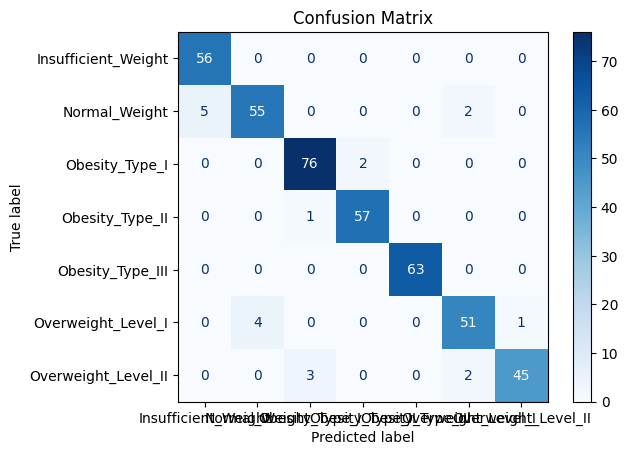

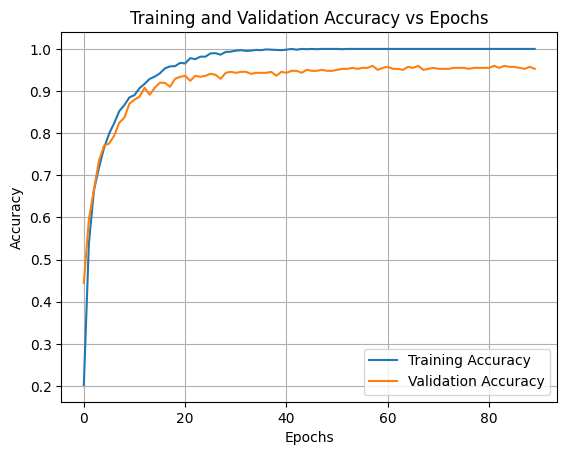

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

file_path = "/content/Obesity prediction.csv"
df = pd.read_csv(file_path)

# Check and clean column names
df.columns = df.columns.str.strip()
print("Columns in dataset:", df.columns)

# Ensure correct target column name
target_column = "Obesity"
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset. Available columns: {df.columns}")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Normalize features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert target to categorical (if classification)
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with actual epochs
epochs = 90  # Set the number of epochs for training
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions and true labels to their original classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders[target_column].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot the graph for epochs vs accuracy
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Save the model (Optional)
model.save("obesity_prediction_model.h5")


EPOCH VALUE 120

Columns in dataset: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')
Epoch 1/120


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2061 - loss: 1.9098 - val_accuracy: 0.5035 - val_loss: 1.4972
Epoch 2/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5085 - loss: 1.3765 - val_accuracy: 0.5768 - val_loss: 1.1583
Epoch 3/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6315 - loss: 1.0657 - val_accuracy: 0.6667 - val_loss: 0.9390
Epoch 4/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7161 - loss: 0.8484 - val_accuracy: 0.7210 - val_loss: 0.7947
Epoch 5/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7308 - loss: 0.7349 - val_accuracy: 0.7565 - val_loss: 0.6950
Epoch 6/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8145 - loss: 0.5928 - val_accuracy: 0.7920 - val_loss: 0.6138
Epoch 7/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8223 - loss: 0.5344 - val_accuracy: 0.8180 - val_loss: 0.5559
Epoch 8/120
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8602 - loss: 0.4530 - val_accuracy: 0.8298 - val_loss: 0.5

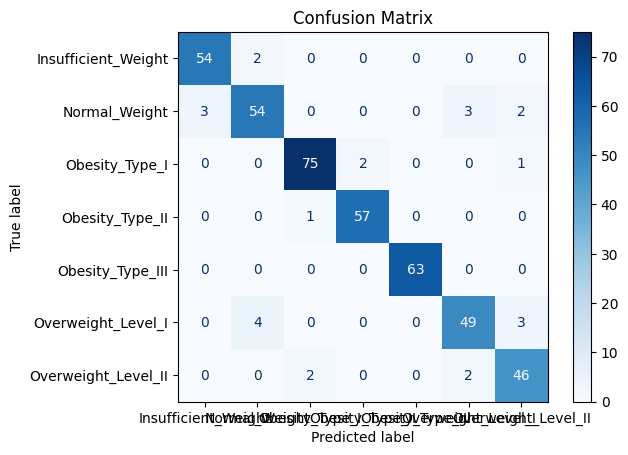

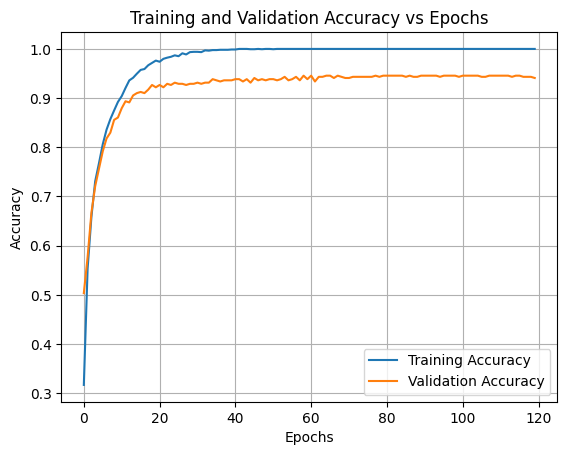

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Obesity prediction.csv"
df = pd.read_csv(file_path)

# Check and clean column names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print("Columns in dataset:", df.columns)  # Debugging step

# Ensure correct target column name
target_column = "Obesity"  # Changed from "NObeyesdad" to "Obesity"
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset. Available columns: {df.columns}")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for future decoding if needed

# Separate features and target
X = df.drop(columns=[target_column])  # Ensure correct target column
y = df[target_column]

# Normalize features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert target to categorical (if classification)
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with actual epochs
epochs = 120  # Set the number of epochs for training
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions and true labels to their original classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders[target_column].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot the graph for epochs vs accuracy
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Save the model (Optional)
model.save("obesity_prediction_model.h5")


EPOCH VALUE 150

Columns in dataset: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')
Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2795 - loss: 1.8560 - val_accuracy: 0.5437 - val_loss: 1.4719
Epoch 2/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5573 - loss: 1.3634 - val_accuracy: 0.6454 - val_loss: 1.0829
Epoch 3/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6573 - loss: 1.0037 - val_accuracy: 0.7021 - val_loss: 0.8744
Epoch 4/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7377 - loss: 0.7806 - val_accuracy: 0.7518 - val_loss: 0.7454
Epoch 5/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7782 - loss: 0.6670 - val_accuracy: 0.7920 - val_loss: 0.6597
Epoch 6/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8076 - loss: 0.6017 - val_accuracy: 0.8061 - val_loss: 0.5834
Epoch 7/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8433 - loss: 0.4995 - val_accuracy: 0.8251 - val_loss: 0.5215
Epoch 8/150
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8524 - loss: 0.4884 - val_accuracy: 0.8345 - val_loss: 0.

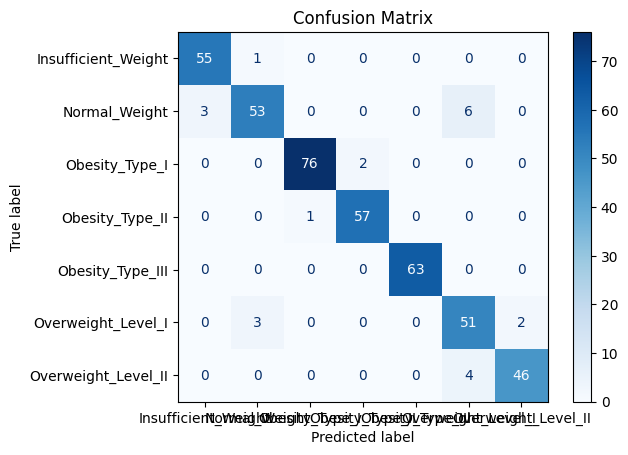

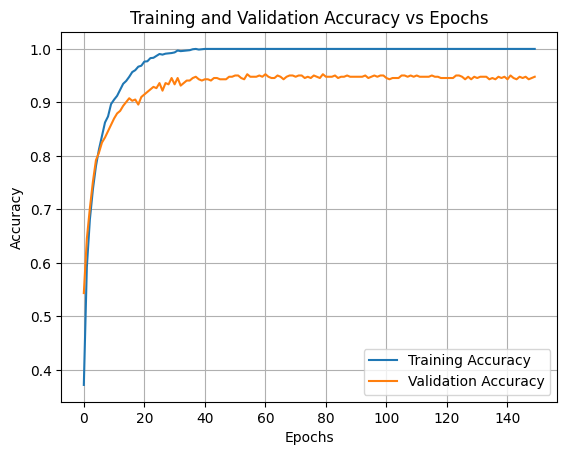

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Obesity prediction.csv"
df = pd.read_csv(file_path)

# Check and clean column names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print("Columns in dataset:", df.columns)  # Debugging step

# Ensure correct target column name
target_column = "Obesity"  # Changed from "NObeyesdad" to "Obesity"
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset. Available columns: {df.columns}")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for future decoding if needed

# Separate features and target
X = df.drop(columns=[target_column])  # Ensure correct target column
y = df[target_column]

# Normalize features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert target to categorical (if classification)
num_classes = len(np.unique(y))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with actual epochs
epochs = 150  # Set the number of epochs for training
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions and true labels to their original classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders[target_column].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot the graph for epochs vs accuracy
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Save the model (Optional)
model.save("obesity_prediction_model.h5")
